In [30]:
import pandas as pd
import numpy as np
import optuna
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [31]:
rf_errors = []
rf_metrics = []

for dataset_name in os.listdir('./data/ds_canada/divisione_anni'):

    print(dataset_name)
    print()

    dataset = pd.read_csv('./data/ds_canada/divisione_anni/' + dataset_name)

    labels = np.array(dataset['SOC (%)'])
    features = np.array(dataset.drop('SOC (%)', axis = 1))

    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

    def objective(trial):
        n_estimators = trial.suggest_int('n_estimators', 100, 2000)
        max_depth = trial.suggest_int('max_depth', 2, 32)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

        rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
        rf_model.fit(train_features, train_labels)

        score = rf_model.score(test_features, test_labels)
        return score

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10)

    rf = RandomForestRegressor(**study.best_params, random_state=42)
    rf.fit(train_features, train_labels)

    predictions = rf.predict(test_features)

    mae = mean_absolute_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)

    rf_errors.append(mae)
    rf_metrics.append(r2)

    importances = list(rf.feature_importances_)

    feature_list = list(dataset.columns)
    feature_list.remove('SOC (%)')

    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

    print()

    for pair in feature_importances:
        print('Variable: {:20} Importance: {}'.format(*pair))
    
    print()

[I 2023-11-15 17:31:01,299] A new study created in memory with name: no-name-dc21fbfb-b371-4f92-a580-d7d304d9eeaa


dataset2017.csv



[I 2023-11-15 17:31:05,074] Trial 0 finished with value: 0.3671653262535839 and parameters: {'n_estimators': 306, 'max_depth': 31, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.3671653262535839.
[I 2023-11-15 17:31:30,337] Trial 1 finished with value: 0.37179781526128763 and parameters: {'n_estimators': 1695, 'max_depth': 25, 'min_samples_split': 9, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.37179781526128763.
[I 2023-11-15 17:31:41,964] Trial 2 finished with value: 0.37590994942128586 and parameters: {'n_estimators': 601, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.37590994942128586.
[I 2023-11-15 17:32:30,188] Trial 3 finished with value: 0.3837311358506311 and parameters: {'n_estimators': 1809, 'max_depth': 17, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.3837311358506311.
[I 2023-11-15 17:32:56,969] Trial 4 finished with value: 0.3849283802907123 and parame


Variable: VDepth               Importance: 0.34
Variable: manual_ndwi_max      Importance: 0.15
Variable: Elev                 Importance: 0.06
Variable: manual_ndvi_max      Importance: 0.04
Variable: manual_ndvi_mean     Importance: 0.03
Variable: manual_ndvi_sd       Importance: 0.03
Variable: manual_evi_median    Importance: 0.03
Variable: manual_gndvi_max     Importance: 0.03
Variable: manual_gndvi_median  Importance: 0.03
Variable: manual_ndwi_median   Importance: 0.03
Variable: manual_ndvi_median   Importance: 0.02
Variable: manual_evi_sd        Importance: 0.02
Variable: manual_evi2_max      Importance: 0.02
Variable: manual_gndvi_sd      Importance: 0.02
Variable: manual_ndwi_sd       Importance: 0.02
Variable: manual_evi_mean      Importance: 0.01
Variable: manual_evi_max       Importance: 0.01
Variable: manual_evi2_mean     Importance: 0.01
Variable: manual_evi2_median   Importance: 0.01
Variable: manual_evi2_sd       Importance: 0.01
Variable: manual_gndvi_mean    Importan

[I 2023-11-15 17:36:16,383] Trial 0 finished with value: 0.46147675011865374 and parameters: {'n_estimators': 410, 'max_depth': 19, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.46147675011865374.
[I 2023-11-15 17:36:54,601] Trial 1 finished with value: 0.4567387475413279 and parameters: {'n_estimators': 1162, 'max_depth': 32, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.46147675011865374.
[I 2023-11-15 17:37:34,263] Trial 2 finished with value: 0.4639669762863272 and parameters: {'n_estimators': 1767, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.4639669762863272.
[I 2023-11-15 17:38:02,466] Trial 3 finished with value: 0.4534628424503798 and parameters: {'n_estimators': 1530, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.4639669762863272.
[I 2023-11-15 17:38:17,239] Trial 4 finished with value: 0.3579073893770819 and parame


Variable: VDepth               Importance: 0.34
Variable: Elev                 Importance: 0.1
Variable: manual_ndvi_median   Importance: 0.05
Variable: manual_evi_sd        Importance: 0.05
Variable: manual_ndwi_max      Importance: 0.04
Variable: manual_ndvi_mean     Importance: 0.03
Variable: manual_evi_mean      Importance: 0.03
Variable: manual_evi_median    Importance: 0.03
Variable: manual_evi2_median   Importance: 0.03
Variable: manual_gndvi_sd      Importance: 0.03
Variable: manual_ndvi_max      Importance: 0.02
Variable: manual_ndvi_sd       Importance: 0.02
Variable: manual_evi_max       Importance: 0.02
Variable: manual_evi2_mean     Importance: 0.02
Variable: manual_gndvi_mean    Importance: 0.02
Variable: manual_gndvi_max     Importance: 0.02
Variable: manual_gndvi_median  Importance: 0.02
Variable: manual_savi_mean     Importance: 0.02
Variable: manual_savi_median   Importance: 0.02
Variable: manual_savi_sd       Importance: 0.02
Variable: manual_ndwi_mean     Importanc

[I 2023-11-15 17:39:41,072] Trial 0 finished with value: 0.42180479037134044 and parameters: {'n_estimators': 868, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.42180479037134044.
[I 2023-11-15 17:39:52,250] Trial 1 finished with value: 0.35778735443303555 and parameters: {'n_estimators': 1131, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.42180479037134044.
[I 2023-11-15 17:40:18,571] Trial 2 finished with value: 0.44255806066417036 and parameters: {'n_estimators': 1823, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.44255806066417036.
[I 2023-11-15 17:40:34,580] Trial 3 finished with value: 0.4359878603292927 and parameters: {'n_estimators': 994, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 2 with value: 0.44255806066417036.
[I 2023-11-15 17:40:57,762] Trial 4 finished with value: 0.3917012942697161 and para


Variable: VDepth               Importance: 0.39
Variable: Elev                 Importance: 0.1
Variable: manual_ndwi_max      Importance: 0.06
Variable: manual_ndvi_median   Importance: 0.04
Variable: manual_evi_mean      Importance: 0.04
Variable: manual_evi_median    Importance: 0.04
Variable: manual_ndvi_mean     Importance: 0.03
Variable: manual_evi_sd        Importance: 0.03
Variable: manual_evi2_median   Importance: 0.03
Variable: manual_ndvi_max      Importance: 0.02
Variable: manual_gndvi_mean    Importance: 0.02
Variable: manual_gndvi_median  Importance: 0.02
Variable: manual_savi_median   Importance: 0.02
Variable: manual_ndwi_mean     Importance: 0.02
Variable: manual_ndvi_sd       Importance: 0.01
Variable: manual_evi_max       Importance: 0.01
Variable: manual_evi2_mean     Importance: 0.01
Variable: manual_evi2_sd       Importance: 0.01
Variable: manual_gndvi_max     Importance: 0.01
Variable: manual_gndvi_sd      Importance: 0.01
Variable: manual_savi_mean     Importanc

[I 2023-11-15 17:43:47,358] Trial 0 finished with value: 0.4446507829471723 and parameters: {'n_estimators': 1416, 'max_depth': 29, 'min_samples_split': 9, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.4446507829471723.
[I 2023-11-15 17:44:19,896] Trial 1 finished with value: 0.46011950510204624 and parameters: {'n_estimators': 1452, 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.46011950510204624.
[I 2023-11-15 17:44:54,924] Trial 2 finished with value: 0.444087474028076 and parameters: {'n_estimators': 1988, 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.46011950510204624.
[I 2023-11-15 17:45:24,432] Trial 3 finished with value: 0.4240169898244218 and parameters: {'n_estimators': 1944, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.46011950510204624.
[I 2023-11-15 17:45:53,641] Trial 4 finished with value: 0.44175641751604433 and para


Variable: VDepth               Importance: 0.36
Variable: Elev                 Importance: 0.1
Variable: manual_ndwi_max      Importance: 0.07
Variable: manual_ndwi_median   Importance: 0.04
Variable: manual_ndvi_median   Importance: 0.03
Variable: manual_evi_mean      Importance: 0.03
Variable: manual_evi_median    Importance: 0.03
Variable: manual_gndvi_mean    Importance: 0.03
Variable: manual_gndvi_max     Importance: 0.03
Variable: manual_gndvi_median  Importance: 0.03
Variable: manual_ndvi_mean     Importance: 0.02
Variable: manual_ndvi_max      Importance: 0.02
Variable: manual_evi_max       Importance: 0.02
Variable: manual_evi_sd        Importance: 0.02
Variable: manual_evi2_mean     Importance: 0.02
Variable: manual_evi2_median   Importance: 0.02
Variable: manual_savi_mean     Importance: 0.02
Variable: manual_savi_median   Importance: 0.02
Variable: manual_ndwi_mean     Importance: 0.02
Variable: manual_ndvi_sd       Importance: 0.01
Variable: manual_evi2_max      Importanc

[I 2023-11-15 17:48:48,210] Trial 0 finished with value: 0.44235651492755224 and parameters: {'n_estimators': 1054, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.44235651492755224.
[I 2023-11-15 17:48:58,538] Trial 1 finished with value: 0.41462449489678854 and parameters: {'n_estimators': 639, 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.44235651492755224.
[I 2023-11-15 17:49:36,753] Trial 2 finished with value: 0.41971400223897903 and parameters: {'n_estimators': 1648, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.44235651492755224.
[I 2023-11-15 17:50:07,135] Trial 3 finished with value: 0.41608200702401965 and parameters: {'n_estimators': 1903, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.44235651492755224.
[I 2023-11-15 17:50:30,073] Trial 4 finished with value: 0.4349600960754122 and pa


Variable: VDepth               Importance: 0.35
Variable: manual_ndvi_median   Importance: 0.12
Variable: Elev                 Importance: 0.08
Variable: manual_ndwi_max      Importance: 0.05
Variable: manual_savi_mean     Importance: 0.04
Variable: manual_evi_mean      Importance: 0.03
Variable: manual_evi_median    Importance: 0.03
Variable: manual_gndvi_max     Importance: 0.03
Variable: manual_ndvi_mean     Importance: 0.02
Variable: manual_ndvi_max      Importance: 0.02
Variable: manual_evi_max       Importance: 0.02
Variable: manual_evi_sd        Importance: 0.02
Variable: manual_evi2_mean     Importance: 0.02
Variable: manual_evi2_median   Importance: 0.02
Variable: manual_gndvi_mean    Importance: 0.02
Variable: manual_savi_median   Importance: 0.02
Variable: manual_ndwi_mean     Importance: 0.02
Variable: manual_ndvi_sd       Importance: 0.01
Variable: manual_evi2_max      Importance: 0.01
Variable: manual_evi2_sd       Importance: 0.01
Variable: manual_gndvi_median  Importan

In [32]:
xgb_errors = []
xgb_metrics = []

for dataset_name in os.listdir('./data/ds_canada/divisione_anni'):

    print(dataset_name)
    print()

    dataset = pd.read_csv('./data/ds_canada/divisione_anni/' + dataset_name)

    labels = np.array(dataset['SOC (%)'])
    features = np.array(dataset.drop('SOC (%)', axis = 1))

    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

    def objective(trial):
        n_estimators = trial.suggest_int('n_estimators', 100, 2000)
        max_depth = trial.suggest_int('max_depth', 2, 32)

        xgboost = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth)
        xgboost.fit(train_features, train_labels)

        score = xgboost.score(test_features, test_labels)
        return score

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10)

    xgboost = XGBRegressor(**study.best_params)
    xgboost.fit(train_features, train_labels)

    predictions = xgboost.predict(test_features)

    mae = mean_absolute_error(test_labels, predictions)
    r2 = r2_score(test_labels, predictions)

    xgb_errors.append(mae)
    xgb_metrics.append(r2)

    importances = list(xgboost.feature_importances_)

    feature_list = list(dataset.columns)
    feature_list.remove('SOC (%)')

    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

    print()

    for pair in feature_importances:
        print('Variable: {:20} Importance: {}'.format(*pair)) 

    print()

[I 2023-11-15 17:52:16,185] A new study created in memory with name: no-name-14cb7a83-914c-411f-b070-e6d93ff0c14b


dataset2017.csv



[I 2023-11-15 17:52:17,135] Trial 0 finished with value: 0.29442805231781644 and parameters: {'n_estimators': 1729, 'max_depth': 19}. Best is trial 0 with value: 0.29442805231781644.
[I 2023-11-15 17:52:17,675] Trial 1 finished with value: 0.28759856557911156 and parameters: {'n_estimators': 1095, 'max_depth': 14}. Best is trial 0 with value: 0.29442805231781644.
[I 2023-11-15 17:52:18,655] Trial 2 finished with value: 0.29000235694489684 and parameters: {'n_estimators': 1696, 'max_depth': 20}. Best is trial 0 with value: 0.29442805231781644.
[I 2023-11-15 17:52:18,826] Trial 3 finished with value: 0.3351208341984555 and parameters: {'n_estimators': 192, 'max_depth': 6}. Best is trial 3 with value: 0.3351208341984555.
[I 2023-11-15 17:52:19,936] Trial 4 finished with value: 0.28794484142013255 and parameters: {'n_estimators': 1188, 'max_depth': 28}. Best is trial 3 with value: 0.3351208341984555.
[I 2023-11-15 17:52:20,162] Trial 5 finished with value: 0.35468732381040613 and parameter


Variable: manual_ndwi_max      Importance: 0.14000000059604645
Variable: VDepth               Importance: 0.11999999731779099
Variable: manual_ndwi_median   Importance: 0.07000000029802322
Variable: manual_ndvi_sd       Importance: 0.05000000074505806
Variable: manual_gndvi_mean    Importance: 0.05000000074505806
Variable: manual_gndvi_median  Importance: 0.05000000074505806
Variable: manual_ndvi_max      Importance: 0.03999999910593033
Variable: manual_evi_max       Importance: 0.03999999910593033
Variable: manual_evi_sd        Importance: 0.03999999910593033
Variable: manual_evi2_max      Importance: 0.03999999910593033
Variable: manual_gndvi_sd      Importance: 0.03999999910593033
Variable: manual_savi_max      Importance: 0.03999999910593033
Variable: manual_ndvi_mean     Importance: 0.029999999329447746
Variable: manual_ndvi_median   Importance: 0.029999999329447746
Variable: manual_evi_median    Importance: 0.029999999329447746
Variable: manual_gndvi_max     Importance: 0.029999

[I 2023-11-15 17:52:23,795] Trial 1 finished with value: 0.3132039821482471 and parameters: {'n_estimators': 1685, 'max_depth': 6}. Best is trial 0 with value: 0.32335371358543463.
[I 2023-11-15 17:52:24,212] Trial 2 finished with value: 0.29830212523473343 and parameters: {'n_estimators': 1738, 'max_depth': 2}. Best is trial 0 with value: 0.32335371358543463.
[I 2023-11-15 17:52:25,306] Trial 3 finished with value: 0.3212104518923544 and parameters: {'n_estimators': 767, 'max_depth': 32}. Best is trial 0 with value: 0.32335371358543463.
[I 2023-11-15 17:52:26,399] Trial 4 finished with value: 0.3212104518923544 and parameters: {'n_estimators': 958, 'max_depth': 31}. Best is trial 0 with value: 0.32335371358543463.
[I 2023-11-15 17:52:26,682] Trial 5 finished with value: 0.30251104637068027 and parameters: {'n_estimators': 170, 'max_depth': 11}. Best is trial 0 with value: 0.32335371358543463.
[I 2023-11-15 17:52:27,816] Trial 6 finished with value: 0.3209979469585391 and parameters: {


Variable: manual_ndwi_median   Importance: 0.23999999463558197
Variable: VDepth               Importance: 0.09000000357627869
Variable: manual_ndvi_median   Importance: 0.07000000029802322
Variable: manual_savi_mean     Importance: 0.05999999865889549
Variable: manual_evi_sd        Importance: 0.05000000074505806
Variable: manual_gndvi_mean    Importance: 0.05000000074505806
Variable: manual_evi2_mean     Importance: 0.03999999910593033
Variable: manual_evi2_sd       Importance: 0.03999999910593033
Variable: manual_gndvi_median  Importance: 0.03999999910593033
Variable: manual_evi_median    Importance: 0.029999999329447746
Variable: manual_evi2_max      Importance: 0.029999999329447746
Variable: manual_evi2_median   Importance: 0.029999999329447746
Variable: manual_gndvi_sd      Importance: 0.029999999329447746
Variable: manual_ndwi_mean     Importance: 0.029999999329447746
Variable: manual_ndwi_max      Importance: 0.029999999329447746
Variable: manual_ndvi_mean     Importance: 0.019

[I 2023-11-15 17:52:32,432] Trial 0 finished with value: 0.33810142560673495 and parameters: {'n_estimators': 1988, 'max_depth': 21}. Best is trial 0 with value: 0.33810142560673495.
[I 2023-11-15 17:52:32,787] Trial 1 finished with value: 0.32158908157783384 and parameters: {'n_estimators': 1209, 'max_depth': 3}. Best is trial 0 with value: 0.33810142560673495.
[I 2023-11-15 17:52:33,884] Trial 2 finished with value: 0.33838493371960365 and parameters: {'n_estimators': 1343, 'max_depth': 31}. Best is trial 2 with value: 0.33838493371960365.
[I 2023-11-15 17:52:34,984] Trial 3 finished with value: 0.33838493371960365 and parameters: {'n_estimators': 1115, 'max_depth': 31}. Best is trial 2 with value: 0.33838493371960365.
[I 2023-11-15 17:52:35,430] Trial 4 finished with value: 0.32158908157783384 and parameters: {'n_estimators': 1748, 'max_depth': 3}. Best is trial 2 with value: 0.33838493371960365.
[I 2023-11-15 17:52:36,200] Trial 5 finished with value: 0.309032793020378 and paramete


Variable: VDepth               Importance: 0.11999999731779099
Variable: manual_evi2_sd       Importance: 0.09000000357627869
Variable: manual_evi_sd        Importance: 0.05999999865889549
Variable: manual_savi_median   Importance: 0.05999999865889549
Variable: manual_ndvi_median   Importance: 0.05000000074505806
Variable: manual_evi2_median   Importance: 0.05000000074505806
Variable: manual_gndvi_mean    Importance: 0.05000000074505806
Variable: manual_savi_mean     Importance: 0.05000000074505806
Variable: manual_savi_sd       Importance: 0.05000000074505806
Variable: manual_ndwi_max      Importance: 0.05000000074505806
Variable: manual_evi_mean      Importance: 0.03999999910593033
Variable: manual_evi_median    Importance: 0.03999999910593033
Variable: manual_evi2_mean     Importance: 0.03999999910593033
Variable: manual_gndvi_median  Importance: 0.03999999910593033
Variable: manual_savi_max      Importance: 0.03999999910593033
Variable: manual_ndvi_max      Importance: 0.029999999

[I 2023-11-15 17:52:41,575] Trial 0 finished with value: 0.14467200587765583 and parameters: {'n_estimators': 1672, 'max_depth': 25}. Best is trial 0 with value: 0.14467200587765583.
[I 2023-11-15 17:52:42,475] Trial 1 finished with value: 0.18171582903541916 and parameters: {'n_estimators': 1576, 'max_depth': 16}. Best is trial 1 with value: 0.18171582903541916.
[I 2023-11-15 17:52:43,672] Trial 2 finished with value: 0.14918555125829847 and parameters: {'n_estimators': 1652, 'max_depth': 21}. Best is trial 1 with value: 0.18171582903541916.
[I 2023-11-15 17:52:44,714] Trial 3 finished with value: 0.15000004963128 and parameters: {'n_estimators': 976, 'max_depth': 23}. Best is trial 1 with value: 0.18171582903541916.
[I 2023-11-15 17:52:45,599] Trial 4 finished with value: 0.14003311291403242 and parameters: {'n_estimators': 961, 'max_depth': 18}. Best is trial 1 with value: 0.18171582903541916.
[I 2023-11-15 17:52:46,589] Trial 5 finished with value: 0.14467200587765583 and parameter


Variable: manual_gndvi_mean    Importance: 0.12999999523162842
Variable: VDepth               Importance: 0.10999999940395355
Variable: manual_gndvi_median  Importance: 0.09000000357627869
Variable: manual_ndwi_max      Importance: 0.07999999821186066
Variable: manual_ndwi_median   Importance: 0.07999999821186066
Variable: manual_evi2_mean     Importance: 0.05999999865889549
Variable: manual_gndvi_max     Importance: 0.05000000074505806
Variable: manual_ndvi_median   Importance: 0.03999999910593033
Variable: manual_evi_median    Importance: 0.03999999910593033
Variable: manual_savi_sd       Importance: 0.03999999910593033
Variable: Elev                 Importance: 0.029999999329447746
Variable: manual_ndvi_sd       Importance: 0.029999999329447746
Variable: manual_ndvi_mean     Importance: 0.019999999552965164
Variable: manual_ndvi_max      Importance: 0.019999999552965164
Variable: manual_evi_mean      Importance: 0.019999999552965164
Variable: manual_evi_max       Importance: 0.0199

[I 2023-11-15 17:52:50,522] Trial 0 finished with value: 0.3053113839152919 and parameters: {'n_estimators': 1775, 'max_depth': 22}. Best is trial 0 with value: 0.3053113839152919.
[I 2023-11-15 17:52:50,965] Trial 1 finished with value: 0.3444111853380809 and parameters: {'n_estimators': 729, 'max_depth': 12}. Best is trial 1 with value: 0.3444111853380809.
[I 2023-11-15 17:52:52,391] Trial 2 finished with value: 0.30486267501642117 and parameters: {'n_estimators': 1994, 'max_depth': 29}. Best is trial 1 with value: 0.3444111853380809.
[I 2023-11-15 17:52:53,570] Trial 3 finished with value: 0.30486267501642117 and parameters: {'n_estimators': 692, 'max_depth': 31}. Best is trial 1 with value: 0.3444111853380809.
[I 2023-11-15 17:52:54,741] Trial 4 finished with value: 0.3051609187829376 and parameters: {'n_estimators': 1759, 'max_depth': 19}. Best is trial 1 with value: 0.3444111853380809.
[I 2023-11-15 17:52:55,216] Trial 5 finished with value: 0.3236689929258513 and parameters: {'n


Variable: manual_savi_mean     Importance: 0.17000000178813934
Variable: VDepth               Importance: 0.11999999731779099
Variable: manual_ndvi_median   Importance: 0.10999999940395355
Variable: manual_gndvi_mean    Importance: 0.10000000149011612
Variable: manual_savi_max      Importance: 0.05999999865889549
Variable: manual_evi2_max      Importance: 0.03999999910593033
Variable: manual_gndvi_median  Importance: 0.03999999910593033
Variable: manual_savi_median   Importance: 0.03999999910593033
Variable: manual_ndwi_mean     Importance: 0.03999999910593033
Variable: manual_evi_max       Importance: 0.029999999329447746
Variable: manual_evi2_mean     Importance: 0.029999999329447746
Variable: manual_evi2_median   Importance: 0.029999999329447746
Variable: manual_gndvi_max     Importance: 0.029999999329447746
Variable: manual_ndwi_max      Importance: 0.029999999329447746
Variable: manual_ndvi_mean     Importance: 0.019999999552965164
Variable: manual_ndvi_sd       Importance: 0.019

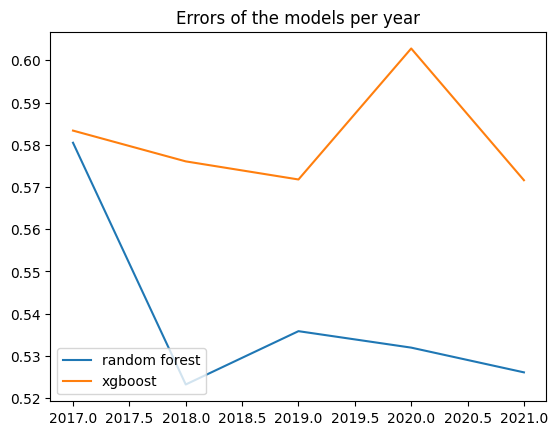

In [33]:
plt.plot(range(2017, 2022), rf_errors)
plt.plot(range(2017, 2022), xgb_errors)
plt.legend(["random forest", "xgboost"], loc ="lower left")
plt.title("Errors of the models per year") 
plt.show() 

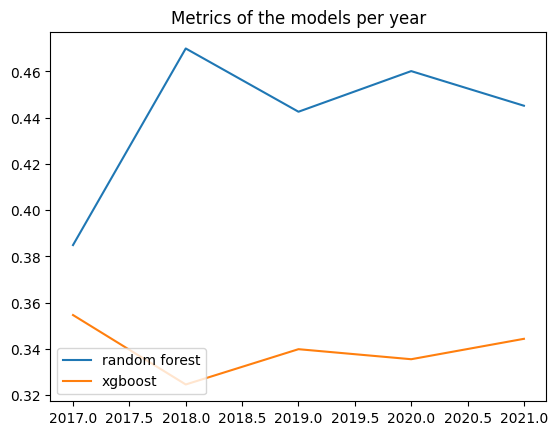

In [34]:
plt.plot(range(2017, 2022), rf_metrics)
plt.plot(range(2017, 2022), xgb_metrics)
plt.legend(["random forest", "xgboost"], loc ="lower left")
plt.title("Metrics of the models per year") 
plt.show() 